# Project: Investigate a Dataset - TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### Questions that can be addressed using this dataset:

Q1: How is the popularity of movies over the years?

Q2: What are recommendation movie's properties to achieve commercial success?
- Investigation on which genre that has become the most commercial successful movie
- Investigation on which cast that has become the most commercial successful movie
- Investigation on which production company that has become the most commercial successful movie
- Investigation on which director that has become the most commercial successful movie
- Investigation on what budget level is required to become the most commercial successful movie

Q3: What are Top 15 favourite movies over the years?

Q4: Which Genres is the most popular among the generations?

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [68]:
# Load dataset
df = pd.read_csv('tmdb-movies.csv')
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [3]:
#Investigation of  null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#Counting missing value in interested data:
df[['cast', 'director' , 'keywords', 'genres' , 'production_companies']].isnull().sum()

cast                      76
director                  44
keywords                1493
genres                    23
production_companies    1030
dtype: int64

In [5]:
#Invesitigation of zero value:
df[['budget_adj' , 'revenue_adj']].describe()

,budget_adj,revenue_adj
count,1.086600e+04,1.086600e+04
mean,1.755104e+07,5.136436e+07
std,3.430616e+07,1.446325e+08
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,2.085325e+07,3.369710e+07
max,4.250000e+08,2.827124e+09


In [6]:
#Investigation of zero value in revenue
rev_zero = df.query('revenue_adj == 0')
rev_zero.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0


In [7]:
#Investigation of zero value in budget
budget_zero = df.query('budget_adj == 0')
budget_zero.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07


Apperently there is zero value in the budget and revenue. Based on the investigation into the dataset, it's supposed to be labeled as NaN instead of zero since the record is not available. Next step is to count how many rows contain zero value for both budget and revenue.

For example [Wild card](https://en.wikipedia.org/wiki/Wild_Card_(2015_film)) has 6.7 million for the revenue

In [8]:
#Counting how many rows contain zero value
rev_zero.count()

id                      6016
imdb_id                 6006
popularity              6016
budget                  6016
revenue                 6016
original_title          6016
cast                    5945
homepage                1271
director                5973
tagline                 3656
keywords                4758
overview                6012
runtime                 6016
genres                  5993
production_companies    5082
release_date            6016
vote_count              6016
vote_average            6016
release_year            6016
budget_adj              6016
revenue_adj             6016
dtype: int64

In [9]:
#Counting how many rows contain zero value
budget_zero.count()

id                      5696
imdb_id                 5687
popularity              5696
budget                  5696
revenue                 5696
original_title          5696
cast                    5631
homepage                1229
director                5656
tagline                 3488
keywords                4534
overview                5692
runtime                 5696
genres                  5674
production_companies    4802
release_date            5696
vote_count              5696
vote_average            5696
release_year            5696
budget_adj              5696
revenue_adj             5696
dtype: int64

There are 6016 revenue data and 5696 budget data that contain zero value, we shouldn't drop this value since the data is too big. However, the data can't be left as zero value because it will affect the calcuation of commercial success / profit. Thus, we should replace with NaN, explanation will be available in the Data Cleaning section.

#### Data Wrangling Summary

Based on the Data Wrangling, there are several steps that need to be done in Data Cleaning Step:

1. Drop the unnecessary columns which are not related with question, such as: imdb_id, budget, revenue, homepage, tagline, overview, keywords

2. Drop the missing value 

3. Drop the duplicate value

4. Replace zero value with NaN value

### Data Cleaning

Remove unnecassary columns that are not related with the research objective. Revenue_adj and budget_adj are choosen in this investigation since it has been adjusted in respect of inflation rate. Therefore, to compare with 1960's value, the value is much more representative. This is to address an investigation of commercial succes (profit)

In [10]:
#Drop Unnecessary Columns:
df.drop(['imdb_id','budget', 'revenue' , 'homepage' , 'tagline', 'overview', 'keywords'], axis=1, inplace= True)
df.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [11]:
#Drop missing value:
clean1= ['cast', 'director', 'genres']
df.dropna(subset = clean1, how='any',inplace= True)

In [12]:
#check data after dropped missing value:
df.isnull().sum()

id                        0
popularity                0
original_title            0
cast                      0
director                  0
runtime                   0
genres                    0
production_companies    959
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64

Production Companies has quite big value to be dropped, by dropping the data it will affect the quality of the investigation. Therefore,we can ....

In [13]:
df['production_companies'] = df['production_companies'].replace(" ", np.NaN)

In [14]:
#Investigate duplicated data:
duplicatedata = sum(df.duplicated())
duplicatedata

1

In [15]:
#Drop duplicated data:
df.drop_duplicates(inplace= True)

Since there are too many null value in budget_adj and revenue_adj, we can't drop the null value since it will affect the quality of the whole data. Thus, we should replace zero value with NaN since by letting the zero value will affect the calculation of profit.

Replacing zero value with non-null value for both budget and revenue column

In [16]:
#replace zero value with nan for both budget and revenue
replace_zero = ['budget_adj','revenue_adj']
df[replace_zero] = df[replace_zero].replace(0., np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
budget_adj              5153 non-null float64
revenue_adj             4843 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


In [17]:
#Checking if NaN has replaced the zero value and missing value
check = df.query('id == 300792')
check

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,300792,0.584363,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,90,Adventure|Documentary,NaN,1/24/15,36,7.8,2015,NaN,NaN


In [18]:
#Check if there is any zero value in budget column
budget_zero = df.query('budget_adj == 0')
budget_zero.count()

id                      0
popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [19]:
#Check if there is any zero value in revenue column
rev_zero = df.query('revenue_adj == 0')
rev_zero.count()

id                      0
popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

After investigating the value in both budget and revenue, apparently there are numerous decimals number, in order to simplify the data, let's round the decimals up

In [20]:
#Round decimals number up in budget_adj and revenue_adj
df['budget_adj']=df['budget_adj'].round(1)

In [21]:
#check if there is no zero value in both revenue and budget
df[['budget_adj' , 'revenue_adj']].tail()

,budget_adj,revenue_adj
10861,NaN,NaN
10862,NaN,NaN
10863,NaN,NaN
10864,NaN,NaN
10865,127642.3,NaN


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : How is the popularity of movies over the years?

In [22]:
#Investigate the value of popularity in dataset
df['popularity'].describe()

count    10731.000000
mean         0.652615
std          1.004804
min          0.000188
25%          0.210765
50%          0.387081
75%          0.720889
max         32.985763
Name: popularity, dtype: float64

To simplify the popularity of each year, this project takes mean value of each year and by using groupby, we can get the mean value for each year

In [23]:
popularity_mean = df.groupby ('release_year').popularity.mean()
popularity_mean.head()

release_year
1960    0.458932
1961    0.422827
1962    0.454783
1963    0.502706
1964    0.412428
Name: popularity, dtype: float64

Visualizing Data to see the trend of popularity of movies throughout the years

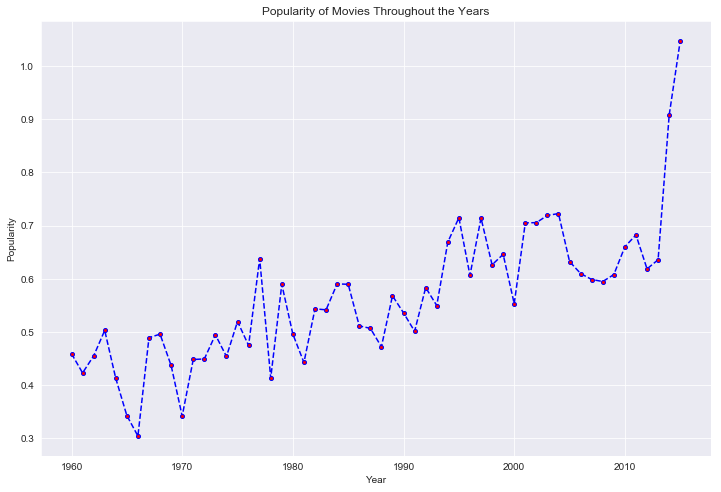

In [24]:
#Set Grid Color
sns.set_style('darkgrid')

#Set size
plt.figure(figsize=(12,8))
plt.plot(popularity_mean,   color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=4)

#Set Label
plt.title('Popularity of Movies Throughout the Years')
plt.ylabel ('Popularity')
plt.xlabel ('Year');

Based on the finding that is presented in the chart, we can conclude that popularity of movies is gradually increase along the years and from 2010 onwards popularity of movies has drastically increased. According to the [TMDb](https://developers.themoviedb.org/3/getting-started/popularity), popularity of a movie will be counted from various factors such as:  
1. Number of views for the day
2. Number of users who marked it as a "favourite" for the day
3. Number of users who added it to their "watchlist" for the day
4. Release date
5. Number of total votes
6. Previous days score

Based on the method that TMDb conduct, this project believe that Internet plays significant role that contribute to the increase of movie's popularity. The easiness of accessing Internet in the past decade makes people easily to view, vote, or mark the movies as favorite or watchlist. This assumption is supported by the article which published by [Julia Muprhy and Max Roser](https://ourworldindata.org/internet) where the growth of internet has increased significantly over the decade.
![alt text]( Internet-users-by-world-region.png "Logo Title Text 3")

### Research Question 2: What are recommendation movie's properties to achieve commercial success?

In  this research question, we will investigate movie's properties such as genres, cast, director, production companies, and production cost (budget) that are likely achieve a commerical success movie. Determination of commercial success movie is based on the profit with 75th percentile and above which is catagorized as high profit.

In [25]:
#Commercial Success is determined by the Profit
df['profit'] = df['revenue_adj'] - df['budget_adj']
df.head(2)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08


In [26]:
df['profit'].describe()

count    3.849000e+03
mean     9.293772e+07
std      1.941716e+08
min     -4.139124e+08
25%     -1.503317e+06
50%      2.745198e+07
75%      1.075480e+08
max      2.750137e+09
Name: profit, dtype: float64

In [27]:
#Set value range for budget
min_value=df['budget_adj'].min()
first_value=df['budget_adj'].describe()[4]
second_value=df['budget_adj'].describe()[5]
third_value=df['budget_adj'].describe()[6]
max_value=df['budget_adj'].max()

#Set bin edges for budget
bin_edges = [min_value, first_value, second_value, third_value, max_value]

#Set labels for budget
bin_names = ['Low','Medium','Moderately High','High']

#Create column for budget level
df['budget_level'] = pd.cut(df['budget_adj'], bin_edges, labels=bin_names)

df.head(2)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,budget_level
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09,High
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08,High


In [28]:
#Set value range for profit
min_value=df['profit'].min()
first_value=df['profit'].describe()[4]
second_value=df['profit'].describe()[5]
third_value=df['profit'].describe()[6]
max_value=df['profit'].max()

#Set bin edges for profit
bin_edges = [min_value, first_value, second_value, third_value, max_value]

#Set labels for profit
bin_names = ['Low','Medium','Moderately High','High']

#Create column for profit level
df['profit_level'] = pd.cut(df['profit'], bin_edges, labels=bin_names)

df.head(2)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,budget_level,profit_level
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09,High,High
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08,High,High


In [29]:
#sorting data for top 15 commercial success movies throughout the years
com_success = df[df['profit_level']=="High"].sort_values(['profit_level','profit'], ascending=[True, False])
#Reindex data from 1
com_success.index = range(len(com_success))
com_success.index = com_success.index + 1

com_success.head(2)


,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,budget_level,profit_level
1,11,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,39575591.4,2.789712e+09,2.750137e+09,Moderately High,High
2,19995,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,240886902.9,2.827124e+09,2.586237e+09,High,High


In [30]:
#set a function that will take the value based on the frequency of appereance in the dataset 
def c(column):
    #first step is to seperate '|' from the string
    c = com_success[column].str.cat(sep = '|')
    
    #set pandas to store the split value
    c = pd.Series(c.split('|'))
    
    #display it in descending order
    count = c.value_counts(ascending = False)
    
    return count

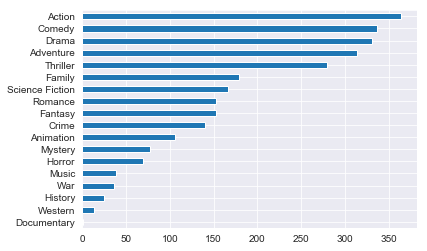

In [31]:
#investigation on which genre that has become the most commercial successful movie
genre_count = c ('genres')
genre_count.sort_values(ascending=True).plot(kind='barh')

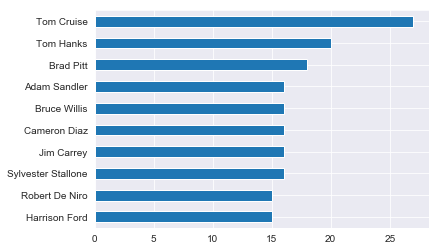

In [32]:
#investigation on which cast that has become the most commercial successful movie
cast_count = c ('cast')
cast_count.head(10).sort_values(ascending=True).plot(kind='barh')

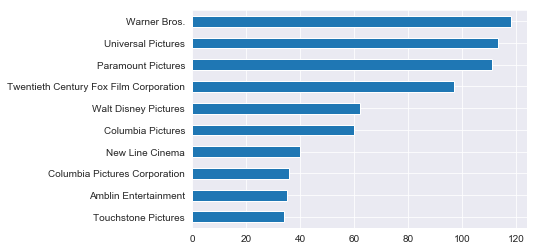

In [33]:
#investigation on which production company that has become the most commercial successful movie
prod_comp = c ('production_companies')
prod_comp.head(10).sort_values(ascending=True).plot(kind='barh')


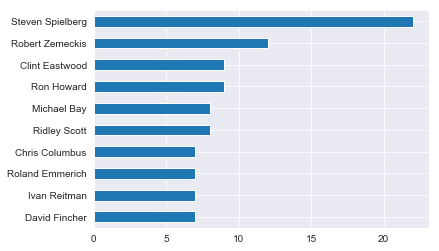

In [34]:
#investigation on which director that has become the most commercial successful movie
director = c ('director')
director.head(10).sort_values(ascending=True).plot(kind='barh')

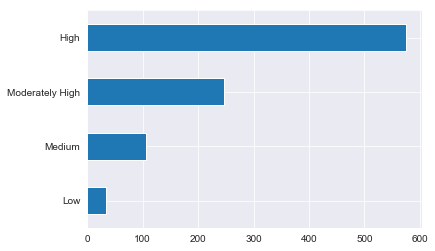

In [35]:
#investigation on what budget level is required to become the most commercial successful movie
budget = c ('budget_level')
budget.sort_values(ascending=True).plot(kind='barh')

In [36]:
com_success.query('budget_level == "High"')['budget_adj'].mean()

111864878.6655652

In [37]:
#To check if the mean of high budget value within the range of third quartile and max value
com_success['budget_adj'].describe()

count    9.620000e+02
mean     7.796980e+07
std      5.698979e+07
min      2.248000e+02
25%      3.326143e+07
50%      6.513842e+07
75%      1.113717e+08
max      3.683713e+08
Name: budget_adj, dtype: float64

Text(0.5, 0.98, 'Recommended Movie Properties to be a Commercial Successful Movie')

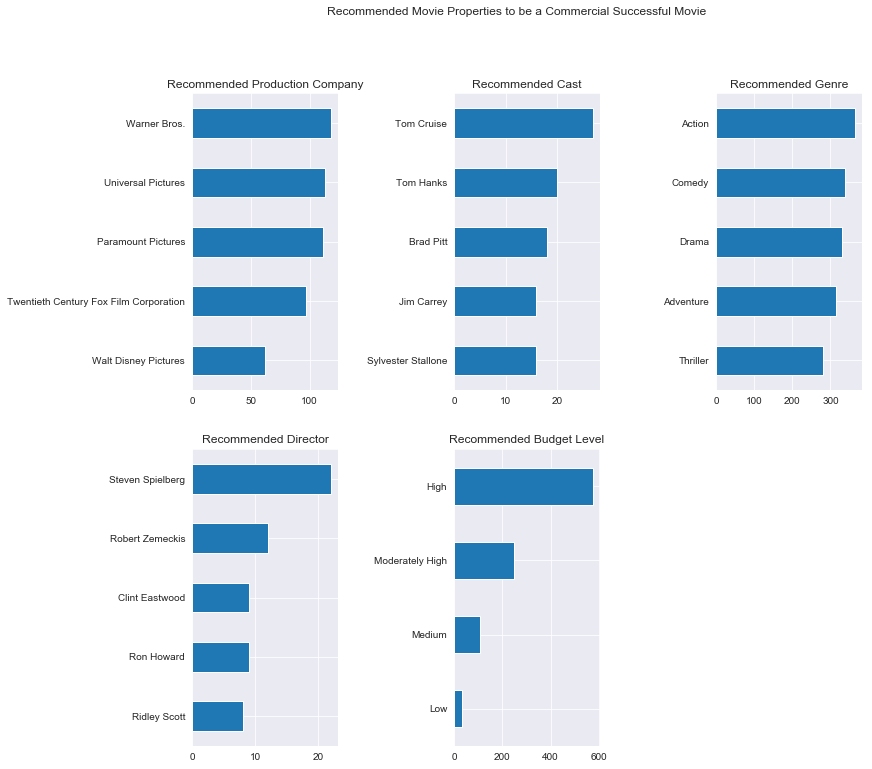

In [38]:
fig = plt.figure()
ax1= fig.add_subplot(2,3,1)
ax2= fig.add_subplot(2,3,2)
ax3= fig.add_subplot(2,3,3)
ax4= fig.add_subplot(2,3,4)
ax5= fig.add_subplot(2,3,5)

fig.subplots_adjust(hspace=0.2, wspace=0.8)

genre_count.head(5).sort_values(ascending=True).plot(kind='barh' , ax=ax3, title='Recommended Genre')
cast_count.head(5).sort_values(ascending=True).plot(kind='barh', ax=ax2 , title='Recommended Cast')
prod_comp.head(5).sort_values(ascending=True).plot(kind='barh',ax=ax1, title='Recommended Production Company')
director.head(5).sort_values(ascending=True).plot(kind='barh',  ax=ax4, title='Recommended Director')
budget.sort_values(ascending=True).plot(kind='barh', figsize=(12,12), ax=ax5, title='Recommended Budget Level')
plt.suptitle('Recommended Movie Properties to be a Commercial Successful Movie')

According to the above findings, there are 5 movie's properties that can be used as an indicator as a recommendation to be a commercial success movie. 

### Research Question 3: What are Top 15 favorite movies over the years?

In this research question we would like to investigate the most favourite movies based on the vote value from the viewer. According to [IMDb](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#), calculating the vote has to be done by using the weighted score through  'Bayesian estimate' method:

weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C

where

- R = average for the movie (mean) = Vote Average
- v = numbers of votes for the movies = Votes Counts
- m = minimum votes required to be listed , using 90th Percentile
- c = the mean vote across the whole report

In [39]:
df.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,budget_level,profit_level
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09,High,High


In [40]:
df['vote_count'].describe()

count    10731.000000
mean       219.812972
std        578.815324
min         10.000000
25%         17.000000
50%         39.000000
75%        148.000000
max       9767.000000
Name: vote_count, dtype: float64

In [41]:
#For minimun vote number we set 90th percentile in order to get higher threshold
m = df['vote_count'].quantile(0.9)
m

519.0

In [42]:
#The mean vote across the whole report
c = df['vote_average'].mean()
c

5.964709719504258

In [43]:
#Weighted rating formula
df['vote_wr']= (df.vote_count/(df.vote_count+m) * df.vote_average) + (m/(m+df.vote_count) * c)

In [44]:
df.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,budget_level,profit_level,vote_wr
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09,High,High,6.454314


In [45]:
#Create new column to combine title and year to simplify data visualization purpose
df['title_and_year'] = (df['original_title'].astype('str') + ','+df['release_year'].astype('str'))

In [46]:
#Top 15 favourite movies based on the viewer's vote
df=df.sort_values('vote_wr', ascending=False)

#Reindex data from 1
df.index = range(len(df))
df.index = df.index + 1

df[['title_and_year','vote_wr']].head(15)


,title_and_year,vote_wr
1,"The Shawshank Redemption,1994",8.198515
2,"The Godfather,1972",8.030003
3,"The Dark Knight,2008",7.976191
4,"Fight Club,1999",7.927970
5,"Pulp Fiction,1994",7.910949
6,"Forrest Gump,1994",7.893820
7,"Interstellar,2014",7.849463
8,"Inception,2010",7.802351
9,"Whiplash,2014",7.798715
10,"The Empire Strikes Back,1980",7.763846


In [47]:
df_title_and_year = df[['title_and_year','vote_wr']].head(15)
df_title_and_year.set_index('title_and_year' , inplace=True)

Text(0, 0.5, 'Movie Title and Release Year')

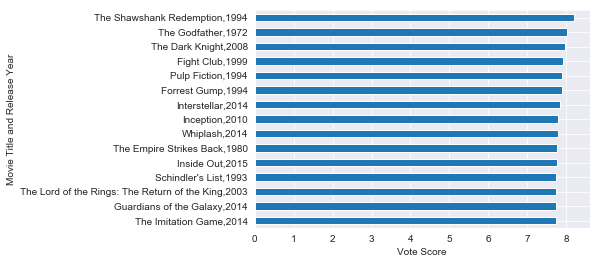

In [48]:
df_title_and_year.sort_values(by='vote_wr',ascending=True).plot(kind='barh' , legend=False).set_xlabel('Vote Score')
plt.ylabel('Movie Title and Release Year')

The above chart is showing the top 15 favourite movie since 1960's based on reviewers' vote and it's dominated by movies in the 1990's and 2000's

### Research Question 4: Which Genres is the most commercial success among the generations?

There is too many unique values for releast year, in order to minimize it,we can make a range according the generation's age range.

Accodring to PEW research Center and Michael T.Robinson, there are at least generations up to now:

The Silent Generation: Born 1928 - 1945
- Baby Boomers: Born 1946 - 1964
- Generation X: Born 1965 - 1980
- Generation Y : Born 1981 - 1996
- Generation Z / Alpha : 1997 - Present

Source:

[PEW Research Center Source](https://www.pewresearch.org/fact-tank/2019/01/17/where-millennials-end-and-generation-z-begins/)

[Michael T.Robinson Source](https://www.careerplanner.com/Career-Articles/Generations.cfm)

Since the release year data is avaiable from 1960, we are not including the silent generation in the range

In [49]:
#Using bin to set the range for generation
bin_genres = [1960,1965,1981,1997,2015]
bin_genres_label=['Baby Boomers','Generation X','Generation Y','Generation Z / Alpha']

Create new column to indicate Generation in the dataframe

In [50]:
df_genres = df.copy()

In [51]:
df_genres['generation'] = pd.cut(df['release_year'], bin_genres, labels = bin_genres_label)
df_genres.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,budget_level,profit_level,vote_wr,title_and_year,generation
1,278,7.192039,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142,Drama|Crime,Castle Rock Entertainment,9/10/94,5754,8.4,1994,36777789.0,4.169346e+07,4.915674e+06,Moderately High,Medium,8.198515,"The Shawshank Redemption,1994",Generation Y
2,238,5.738034,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,175,Drama|Crime,Paramount Pictures|Alfran Productions,3/15/72,3970,8.3,1972,31287365.6,1.277914e+09,1.246626e+09,Moderately High,High,8.030003,"The Godfather,1972",Generation X
3,155,8.466668,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,7/16/08,8432,8.1,2008,187365527.3,1.014733e+09,8.273675e+08,High,High,7.976191,"The Dark Knight,2008",Generation Z / Alpha
4,550,8.947905,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,139,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,10/14/99,5923,8.1,1999,82470329.3,1.320229e+08,4.955256e+07,High,Moderately High,7.927970,"Fight Club,1999",Generation Z / Alpha
5,680,8.093754,Pulp Fiction,John Travolta|Samuel L. Jackson|Uma Thurman|Br...,Quentin Tarantino,154,Thriller|Crime,Miramax Films|A Band Apart|Jersey Films,10/14/94,5343,8.1,1994,11768892.5,3.147131e+08,3.029442e+08,Medium,High,7.910949,"Pulp Fiction,1994",Generation Y


In [52]:
#query for baby boomers
baby_boomers= df_genres.query('generation == "Baby Boomers"')

#query for high profit only
bb_profit = baby_boomers.query('profit_level == "High"')

#Create function that will pick the genres data based on their appereance in the dataset for Baby Boomers 
def g(column):
    #first step is to seperate '|' from the string
    g = bb_profit[column].str.cat(sep = '|')
    
    ##set pandas to store the split value
    g = pd.Series(g.split('|'))
    
    #displaying in descending order
    bb_profit_count = g.value_counts(ascending = False)
    
    return bb_profit_count

Text(0.5, 1.0, 'The Most Commerical Success Genres in Baby Boomers Generation')

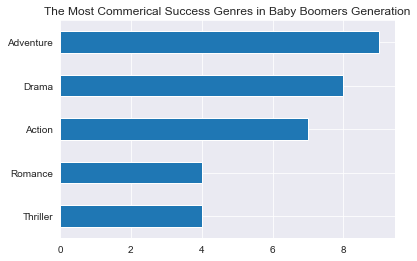

In [53]:
#Findings of the most commerical success genres in baby boomers generation
bb_profit_count = g ('genres')

#Plot bar chart for the most commerical success genres in baby boomers generation
bb_profit_count.head(5).sort_values(ascending = True).plot(kind='barh')
plt.title('The Most Commerical Success Genres in Baby Boomers Generation')

In [54]:
#query for generation x
generation_x = df_genres.query('generation == "Generation X"')
#query for high profit only
gx_profit = generation_x.query('profit_level == "High"')
def h(column):
    
    h = gx_profit[column].str.cat(sep='|')
    
    h = pd.Series(h.split('|'))
    
    gx_profit_count = h.value_counts(ascending = False)
    
    return gx_profit_count

Text(0.5, 1.0, 'The Most Commerical Success Genres in Generation X')

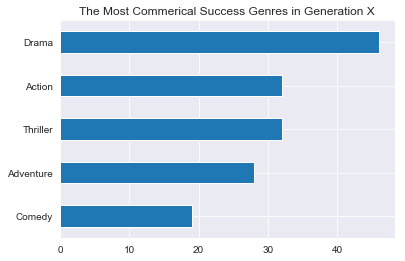

In [55]:
#Findings of the most commerical success genres in generation x
gx_profit_count = h ('genres')

#plot bar chart for the most commerical success genres in generation x
gx_profit_count.head(5).sort_values(ascending=True).plot(kind='barh')
plt.title('The Most Commerical Success Genres in Generation X')


In [56]:
#query for generation y
generation_y = df_genres.query('generation == "Generation Y"')
#query for high profit only
gy_profit = generation_y.query('profit_level == "High"')

def i (column):
    i = gy_profit[column].str.cat(sep ='|')
    
    i = pd.Series(i.split ('|'))
    
    gy_profit_count = i.value_counts(ascending = False)
    
    return gy_profit_count


Text(0.5, 1.0, 'The Most Commerical Success Genres in Generation Y')

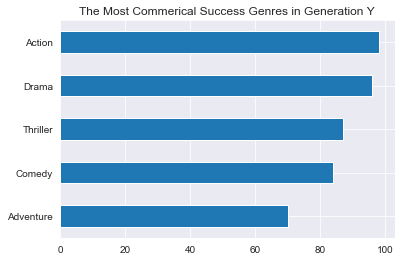

In [57]:
#Findings of the most commerical success genres in generation y
gy_profit_count = i('genres')
#Plot bar chart for The Most Commerical Success Genres in Generation Y
gy_profit_count.head(5).sort_values(ascending = True).plot(kind='barh')
plt.title('The Most Commerical Success Genres in Generation Y')

In [58]:
#Query for generation z/alpha
generation_z= df_genres.query('generation == "Generation Z / Alpha"')
#query for high profit only
gz_profit = generation_z.query('profit_level == "High"')
def j (column):
    
    j = gz_profit[column].str.cat(sep = '|')
    
    j = pd.Series(j.split('|'))
    
    gz_profit_count = j.value_counts(ascending = False)
    
    return gz_profit_count


Text(0.5, 1.0, 'The Most Commerical Success Genres in Generation Z / Alpha')

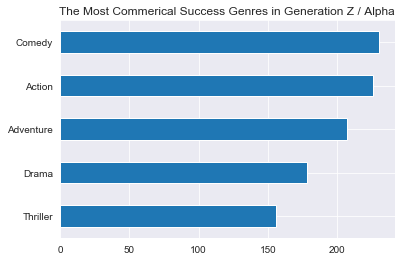

In [59]:
#Findings of the most commerical success genres in generation z / alpha
gz_profit_count = j ('genres')

#Plot bar chart for The Most Commerical Success Genres in Generation Z / Alpha
gz_profit_count.head(5).sort_values(ascending = True).plot(kind='barh')
plt.title('The Most Commerical Success Genres in Generation Z / Alpha') 

In [60]:
four_gen = df_genres.query('profit_level == "High"')
four_gen.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,budget_level,profit_level,vote_wr,title_and_year,generation
2,238,5.738034,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,175,Drama|Crime,Paramount Pictures|Alfran Productions,3/15/72,3970,8.3,1972,31287365.6,1.277914e+09,1.246626e+09,Moderately High,High,8.030003,"The Godfather,1972",Generation X
3,155,8.466668,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,7/16/08,8432,8.1,2008,187365527.3,1.014733e+09,8.273675e+08,High,High,7.976191,"The Dark Knight,2008",Generation Z / Alpha
5,680,8.093754,Pulp Fiction,John Travolta|Samuel L. Jackson|Uma Thurman|Br...,Quentin Tarantino,154,Thriller|Crime,Miramax Films|A Band Apart|Jersey Films,10/14/94,5343,8.1,1994,11768892.5,3.147131e+08,3.029442e+08,Medium,High,7.910949,"Pulp Fiction,1994",Generation Y
6,13,6.715966,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,142,Comedy|Drama|Romance,Paramount Pictures,7/6/94,4856,8.1,1994,80911135.9,9.973333e+08,9.164222e+08,High,High,7.893820,"Forrest Gump,1994",Generation Y
7,157336,24.949134,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,151980023.4,5.726906e+08,4.207106e+08,High,High,7.849463,"Interstellar,2014",Generation Z / Alpha


In [61]:
#Query for all generation with high profit
four_gen = df_genres.query('profit_level == "High"')
def k (column):
    
    k = four_gen[column].str.cat(sep = '|')
    
    k = pd.Series(k.split('|'))
    
    four_gen_count = k.value_counts(ascending = False)
    
    return four_gen_count

Text(0.5, 1.0, 'The Most Commerical Success Genres in All Generations')

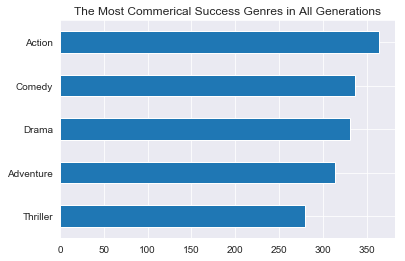

In [66]:
four_gen_count = k('genres')
four_gen_count.head(5).sort_values(ascending = True).plot(kind='barh')
plt.title('The Most Commerical Success Genres in All Generations')

Text(0.5, 0.98, 'The Most Commercial Success Genres Through Generations')

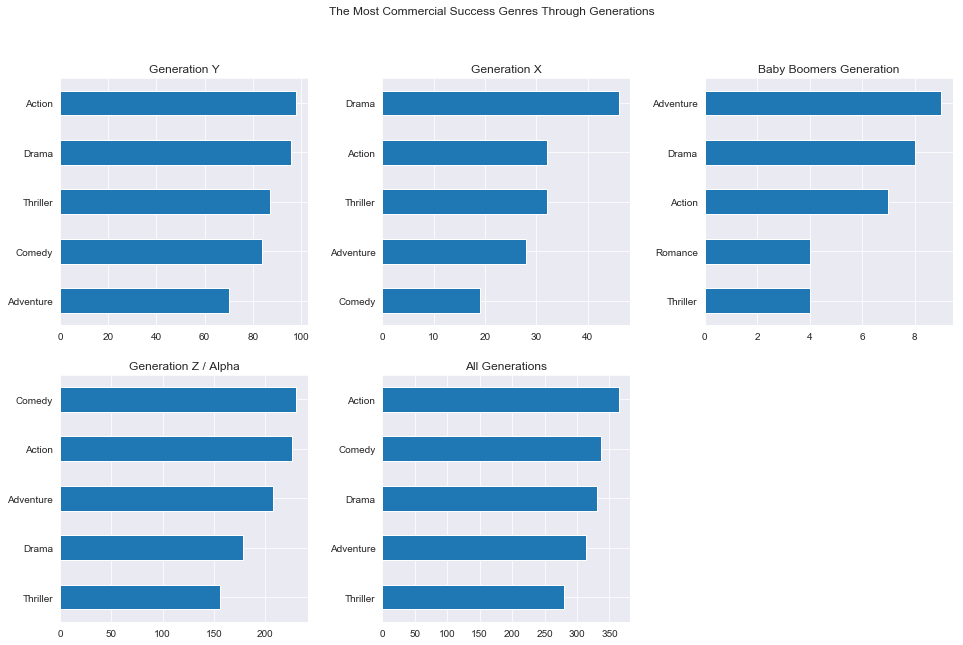

In [67]:
#Using subplot to plot all the charts in once
fig = plt.figure()
ax1= fig.add_subplot(2,3,1)
ax2= fig.add_subplot(2,3,2)
ax3= fig.add_subplot(2,3,3)
ax4= fig.add_subplot(2,3,4)
ax5= fig.add_subplot(2,3,5)

#Setting the space in subplot
fig.subplots_adjust(hspace=0.2, wspace=0.3)

#Ploting the chart accroding to the ax number
bb_profit_count.head(5).sort_values(ascending = True).plot(kind='barh', ax=ax3, title='Baby Boomers Generation')
gx_profit_count.head(5).sort_values(ascending=True).plot(kind='barh', ax=ax2 , title='Generation X')
gy_profit_count.head(5).sort_values(ascending = True).plot(kind='barh',ax=ax1, title='Generation Y')
gz_profit_count.head(5).sort_values(ascending = True).plot(kind='barh',  ax=ax4, title='Generation Z / Alpha')
four_gen_count.head(5).sort_values(ascending = True).plot(kind='barh', figsize=(16,10), ax=ax5, title='All Generations')
plt.suptitle('The Most Commercial Success Genres Through Generations')

The above data visualization are presenting the most commercial success genres in respect generations. As we can refer to the charts, the top commercial success genres are dominated by action, drama, comedy, adventure, and thriller in general. The generalization of commercial success genres in four generations is same with the most commercial success genres in the whole generations. This means those five genres are constantly in the top 5 genres from 1960's untill 2000's

<a id='conclusions'></a>
## Conclusions

#### Q1: How is the popularity of movies over the years?

In this research question, I am investigating the popularity of movies from 1960’s until 2000’s by averaging the popularity score in each year. Based on the chart, it shows a positive trend which popularity of movies is increasing along the years. An interesting finding in this research question is there is a spike of increment on 2010 onwards. I believe this is due to the growth of internet that has been drastically increase after 2000. As generally known, several streaming platforms entered the industry after 2000’s such as Netflix, Amazon Prime Video, Youtube, Hulu, and others. Those platforms lead viewers have high accessibility to watch the movie. This finding indicates that film industry is growing exponentially along with the growth of internet in nowadays.

#### Q2: Findings Analysis - What are recommendation movie's properties to achieve commercial success?

In this research question, the scope of investigation is narrowed down only for commercial success movie. Since as we know, there are numbers of failed movie even though it was produced with high budget and with famous casts and director. Therefore, the intention to conduct this investigation is to be able provide a recommendation what kind of movie’s properties that the industry need to consider before they produce a movie in order to be a commercial success. 

In this project, revenue and budget with adjusment value were used. Considering the inflation rate is critically important since we are investigating profit from the data in 1960's untill 2000's.
Determination of commercial success is based on the profit by subtracting revenue with budget. Then I classify the profit into 4 subcategories, such as low (0-25%), medium (25-50%), moderately high (50 – 75%) and high (>75%).  This research question is only focused on high profit movies (75th Percentile). By using query, we can have the desired dataframe. Based on the new dataframe, the investigation can be done for each movie’s properties such production company, cast, genre, director, and budget level. Since the unique value in production movie, cast, director, and genres are repetitive in each row, we need to gather the value based on the number of appearances in the whole dataset. By only selecting top 5 value of each movie properties, the recommendation can be used to produce a commercial success movie in the future. 

Those recommended movie's properties are:

**1.Recommended Production Movie:**
- Warner Bros
- Universal Pictures
- Paramount Pictures
- Twentieth Century Fox Film Corp
- Walt Disney Pictures

**2.Recommended Cast:**
- Tom Cruise 
- Tom Hanks
- Brad Pitt
- Adam Sandler
- Sylvester Stallone

**3.Recommended Genre:**
- Action
- Comedy
- Drama
- Adventure 
- Thriller

**4.Recommended Director:**
- Steve Spielberg
- Robert Zemeckis
- Clint Eastwood
- Ron Howard
- Michael Bay

**5.Recommended Movie budget:**
- To have a commercial successfull movie, to production movie is suggested to have a high budget with an average of $ 111,864,878


#### Q3: Findings Analysis - What are Top 15 favourite movies over the years?

In this research question, we are interested to investigate the most favorite movies based on the viewer’s vote. Since the number of vote for each movie is not equivalent, we can’t take the vote average to determine the favorite movie. Based on the IMDb, the right method to calculate favorite movie is by using weighted rating (Bayesian Method). Based on this weighted average, the top 15 favorite movies can be investigated.

#### Q4: Findings Analysis - Which Genres is the most popular among the generations?

This research question aims to support a recommendation of recommended genre in the second research question. Since the recommended genre based on high profit movies was done based on the whole generation, this research question is testing the consistency of those 5 recommended genres through generation by generation. According the given data, there are 4 generation been set. The finding shows that **action, drama, comedy, adventure, and thriller** are the most frequent genres that appear as the most commercial success throughout the generations.

### Limitation

1.Revenue and Budget Data Quality
- Since there are numerous zero data, we can’t remove it by considering the quality of dataset. This recommendation is not quite precise since almost 50% of the value is filled by Nan value, thus it tends to create a bias.

2.Keywords
- This project is not using keywords data as a research instrument due to limitation of researcher’s knowledge. Further research will be recommended to use keywords data as resourceful instrument to create a prediction for machine learning. 

3.Recommendation Time Frame
- The accuracy of the recommendation based on the several movie's properties such as cast and director could be affected by age factor
